In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [3]:
data = pd.read_csv("/content/drive/MyDrive/데이터과학/week10/test_data_set.csv", encoding="utf-8")
print('total samples : ', len(data))

total samples :  11979


In [4]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


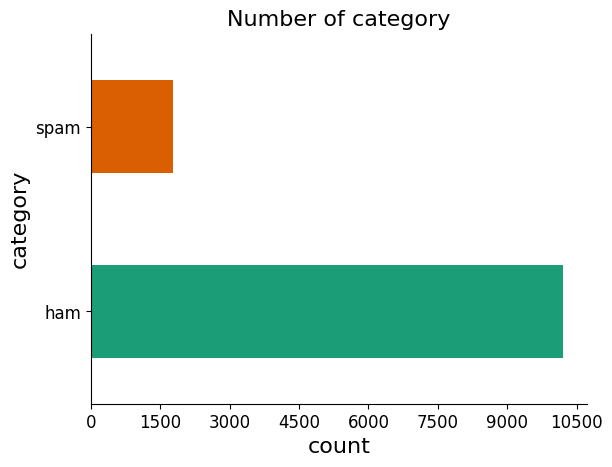

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

values = data["v1"].value_counts()
values.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Number of category", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("category", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [6]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

<ipython-input-6-100415b19030>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11979 entries, 0 to 11978
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      11979 non-null  int64 
 1   v2      11979 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.3+ KB


In [8]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [9]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 10859


In [10]:
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 10859


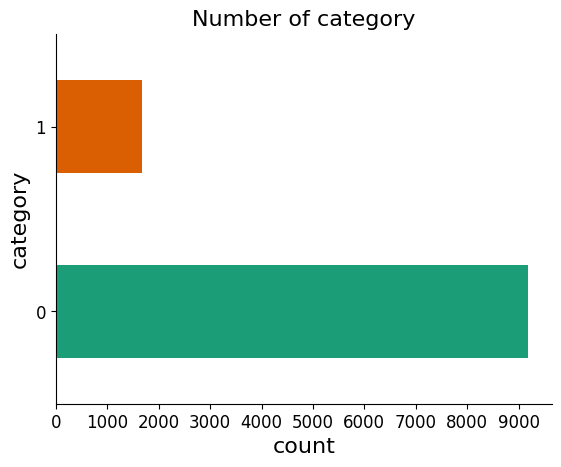

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

values = data["v1"].value_counts()
values.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Number of category", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("category", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [12]:
print('ham과 spam의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

ham과 spam의 개수
   v1  count
0   0   9190
1   1   1669


In [13]:
spam = data['v1'].value_counts()[1]
ham = data['v1'].value_counts()[0]
print(spam, ham)

1669 9190


In [14]:
ham_ratio = round(spam/len(data)*100,3)
spam_ratio = round(ham/len(data)*100,3)
print(ham_ratio)
print(spam_ratio)

15.37
84.63


In [15]:
print(f'정상 문자 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 문자 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')


정상 문자 비율 = 84.63%
스팸 문자 비율 = 15.37%


In [16]:
X_data = data['v2']
y_data = data['v1']
print('문자열 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))


문자열 본문의 개수: 10859
레이블의 개수: 10859


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
print(X_train.shape)
print(y_train.shape)


(8687,)
(8687,)


In [18]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 문자 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 문자 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 문자 = 84.632%
스팸 문자 = 15.368%


In [19]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 문자 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 문자 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 문자 = 84.622%
스팸 문자 = 15.378%


In [20]:
print('--------훈련 데이터-----------')
print(X_train[:10])
print('--------테스트 데이터-----------')
print(X_test[:10])

--------훈련 데이터-----------
9723                                           랄로 왜 메랜 안함?
10927                                 역시 색다른 메뉴가 있으면 좋은듯..
2710     Hope you enjoyed your new content. text stop t...
7895                                    t1 경기 사이에 보는게 맛있긴해
8028     ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도...
2838     Easy mate, * guess the quick drink was bit amb...
7499                                                치감대 ㅎㅇ
6320                        디지털 카메라의 기준은 하나다! 캐논인가 캐논이 아닌가
6402                                      PC는 달라도 모니터는 샘트론
761      We are at grandmas. Oh dear, u still ill? I fe...
Name: v2, dtype: object
--------테스트 데이터-----------
10934            26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!
3447     Its  &lt;#&gt; k here oh. Should i send home f...
2471                 sry can't talk on phone, with parents
6631                              에헤에 암살부분 나레이션 맘에등어서 구독!!
1288                              Happy new year to u too!
6312                                  

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[254, 141, 6699, 2463], [316, 6700, 6701, 2106, 4087], [137, 2, 4088, 13, 108, 1054, 70, 94, 3, 6702, 3, 885, 284, 6703, 4089, 79, 6704, 306, 238], [317, 1427, 6705, 3049, 6706], [6707, 809, 6708, 6709, 6710, 2464, 6711, 6712, 6713, 6714, 2107, 6715, 6716]]


In [22]:
len(X_train_encoded)

8687

In [23]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'you': 2, 'to': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'that': 17, 'call': 18, 'on': 19, 'are': 20, '2': 21, 'so': 22, 'now': 23, 'not': 24, 'but': 25, 'at': 26, 'or': 27, 'can': 28, 'with': 29, 'do': 30, "i'm": 31, 'be': 32, '진짜': 33, 'will': 34, 'get': 35, 'we': 36, 'if': 37, 'just': 38, 'no': 39, 'ur': 40, 'this': 41, 'up': 42, 'how': 43, '4': 44, 'gt': 45, 'lt': 46, 'go': 47, 'from': 48, 'out': 49, 'when': 50, 'ok': 51, 'know': 52, 'free': 53, 'all': 54, 'what': 55, 'ㅋㅋ': 56, 'like': 57, 'got': 58, 'good': 59, 'then': 60, 'am': 61, '롤지노': 62, 'time': 63, 'its': 64, 'come': 65, 'was': 66, 'only': 67, 'day': 68, 'want': 69, 'text': 70, 'love': 71, 'there': 72, '너무': 73, 'going': 74, 'he': 75, 'one': 76, 'lor': 77, 'as': 78, 'by': 79, 'about': 80, '더': 81, 'still': 82, 'r': 83, 'home': 84, 'send': 85, 'ㅋㅋㅋ': 86, 'txt': 87, 'need': 88, 'see': 89, 'back': 90, 'k': 91, 'our': 92, "i'll":

In [24]:
print(tokenizer.word_counts.items())

odict_items([('랄로', 42), ('왜', 77), ('메랜', 1), ('안함', 4), ('역시', 35), ('색다른', 1), ('메뉴가', 1), ('있으면', 5), ('좋은듯', 2), ('hope', 78), ('you', 1653), ('enjoyed', 2), ('your', 511), ('new', 101), ('content', 11), ('text', 150), ('stop', 108), ('to', 1649), ('61610', 1), ('unsubscribe', 13), ('help', 39), ('08712400602450p', 1), ('provided', 2), ('by', 127), ('tones2you', 1), ('co', 36), ('uk', 45), ('t1', 35), ('경기', 8), ('사이에', 1), ('보는게', 3), ('맛있긴해', 1), ('ㅋㅋㅋ어릴땐', 1), ('그래도', 14), ('통일해야지', 1), ('이거였는데', 1), ('일하고보니까', 1), ('지금도', 4), ('세금내기', 1), ('ㅈ같은데', 1), ('태도도', 1), ('ㅈ같네', 1), ('하면서', 5), ('안하는게ㅋㅋㅋㅋㅌ걍', 1), ('쏴', 1), ('easy', 21), ('mate', 12), ('guess', 28), ('the', 992), ('quick', 8), ('drink', 15), ('was', 162), ('bit', 36), ('ambitious', 1), ('치감대', 1), ('ㅎㅇ', 2), ('디지털', 4), ('카메라의', 2), ('기준은', 1), ('하나다', 1), ('캐논인가', 1), ('캐논이', 1), ('아닌가', 13), ('pc는', 1), ('달라도', 3), ('모니터는', 1), ('샘트론', 1), ('we', 280), ('are', 384), ('at', 309), ('grandmas', 1), ('oh', 90), ('dear', 

In [31]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 18073
단어 집합(vocabulary)에서 희귀 단어의 비율: 72.96031649913205
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 18.9115375761254


In [32]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))


단어 집합의 크기: 24772


문자의 최대 길이 : 162
문자의 평균 길이 : 11.001036


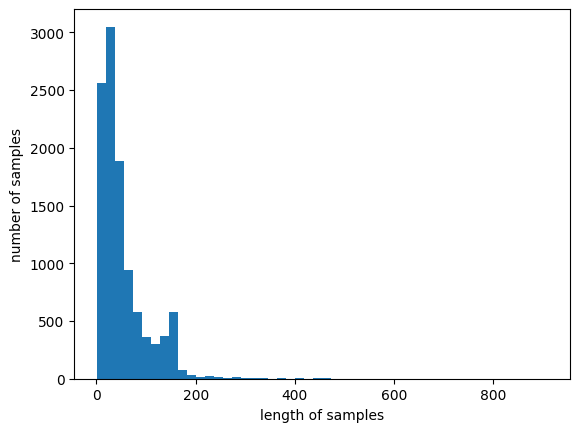

In [34]:
print('문자의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('문자의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [35]:
max_len = 162
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (8687, 162)


In [45]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)


Epoch 1/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 183ms/step - acc: 0.8275 - loss: 0.4606 - val_acc: 0.9154 - val_loss: 0.2620
Epoch 2/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - acc: 0.9502 - loss: 0.1753 - val_acc: 0.9448 - val_loss: 0.1473
Epoch 3/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - acc: 0.9829 - loss: 0.0583 - val_acc: 0.9545 - val_loss: 0.1349
Epoch 4/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - acc: 0.9932 - loss: 0.0298 - val_acc: 0.9269 - val_loss: 0.1851


In [47]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.9571 - loss: 0.1313

 테스트 정확도: 0.9595


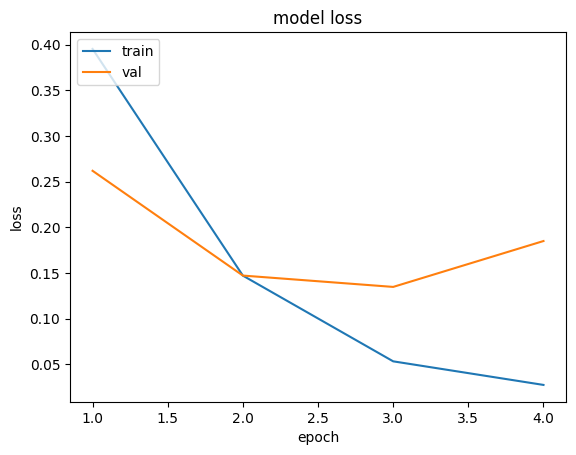

In [46]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()